# Overfitting and Regularization in Deep Learning

---

## 1. What is Overfitting?

- Overfitting happens when a model **memorizes the training data** instead of learning to generalize.
- The model performs well on training data but **fails to predict well on unseen (test/validation) data**.
- It usually occurs when the model is **too complex** or trained **too long** on limited data.

### 📈 Visual Intuition

| Model Type | Training Accuracy | Test Accuracy | Behavior         |
|------------|-------------------|---------------|------------------|
| Underfit   | Low               | Low           | Too simple       |
| Good Fit   | High              | High          | Generalizes well |
| Overfit    | Very High         | Low           | Memorizes data   |

---

## 2. How to Detect Overfitting

### 📉 Typical Symptoms:
- High training accuracy, but low validation/test accuracy.
- The gap between training and validation loss **widens over epochs**.

---

## 3. Causes of Overfitting

- Too complex model (many layers/parameters).
- Too few training samples.
- Training for too many epochs.
- Noisy or high-variance data.
- Lack of regularization techniques.


# ✅ Techniques to Fix Overfitting

---

## 1. Regularization

Regularization adds a **penalty** to the loss function to discourage overly complex models with large weights. This helps reduce overfitting by controlling the capacity of the model.

### 🔹 L2 Regularization (Ridge)

- Adds a penalty proportional to the **square of the weights**.
- The modified loss function becomes:

$$
L' = L + \lambda \sum w_i^2
$$

Where:
- $L$ is the original loss (e.g., MSE or cross-entropy),
- $\lambda$ is the regularization strength (a small positive value),
- $w_i$ are the model’s weights.

- This technique **shrinks weights**, pushing them closer to zero but rarely exactly zero.
- Encourages simpler models by discouraging large weight values.

### 🔹 L1 Regularization (Lasso)

- Adds a penalty proportional to the **absolute value of weights**:

$$
L' = L + \lambda \sum |w_i|
$$

- This technique encourages **sparsity** — i.e., many weights become exactly zero.
- As a result, it effectively performs **feature selection** during training.

✅ **Use regularization when your model has too many parameters or is highly flexible** (e.g., deep networks or wide layers).

---

## 2. Dropout

Dropout is a regularization technique where **a fraction of neurons is randomly deactivated (set to zero)** during training on each forward pass.

- This prevents neurons from relying too heavily on specific other neurons — a behavior known as **co-adaptation**.
- It makes the network **more robust**, forcing it to learn redundant representations.
- During testing or inference, all neurons are used, but their outputs are scaled accordingly to account for the dropout during training.

✅ **Especially effective in fully connected (dense) layers of deep neural networks**.

---

## 3. Early Stopping

Early stopping involves monitoring the **validation loss** during training and **stopping the process when the validation loss stops improving** (starts increasing).

- Overfitting usually occurs after the training loss continues to decrease while validation loss begins to rise.
- By halting training at the point where the model starts overfitting, you save both time and computational resources.

✅ **Highly useful when validation performance is tracked during training**.

---

## 4. Data Augmentation

Data augmentation increases the **size and diversity** of the training dataset by applying various transformations or alterations to the original data.

- In **images**, common techniques include:
  - Rotation, flipping, scaling, cropping
  - Color jittering, brightness adjustment, and adding noise

- In **text**, common augmentation strategies include:
  - Synonym replacement
  - Back translation
  - Random deletion or swapping of words

- In **audio**, examples include:
  - Adding background noise
  - Time stretching or pitch shifting

✅ **Essential when you have a small or imbalanced dataset** to help the model generalize better.

---

## 5. Simplify the Model

Overfitting often results from using models that are **too complex** relative to the size and complexity of the training data.

Ways to simplify the model:
- Use **fewer hidden layers** or **fewer neurons per layer**
- Reduce **model depth or width**
- Remove **unnecessary features** from input

✅ **Simplifying the model reduces its ability to memorize noise**, which helps it generalize better.

---

## 6. More Training Data

A fundamental and highly effective way to reduce overfitting is to **increase the size of the training dataset**.

- More data helps the model **learn the true distribution** instead of memorizing specific samples.
- Useful strategies to increase data:
  - **Collect more real-world samples**
  - **Use transfer learning** (pre-trained models)
  - **Use synthetic data** generated via data augmentation or generative models

✅ **More data = less chance of memorization = better generalization**.

---


In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd


# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3,1)
        
        
        # Activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
    
model = NeuralNetwork()
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


        
data = pd.read_csv('data.csv')     

X = data[['age_in_years', 'income(1000$)']].values
Y_true = data['purchase'].values.reshape(-1, 1)   # .reshape -> numpy .view(-1, 1)


class CustomDataset(Dataset):
    def __init__(self, X, Y_true):
        self.X = X
        self.Y_true = Y_true

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.Y_true[index], dtype=torch.float32)


batch_size = 32
data = CustomDataset(X, Y_true)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)


losses = []

num_epochs = 100

# model.train()

for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        y_pred = model(batch_x) #Forward pass
        
        loss = loss_function(y_pred, batch_y) # Calculate loss
        
        optimizer.zero_grad() # clear gradient
        loss.backward() # backward pass: compute gradient dl/dw
        optimizer.step() # weight update
        
        losses.append(loss.item())
        
    if epoch % 10 == 0:
        print(f"Epoch{epoch} loss = {loss.item()}")
        
        
        

        
        
        





Epoch0 loss = 4.7472381591796875
Epoch10 loss = 0.8462001085281372
Epoch20 loss = 0.6443585753440857
Epoch30 loss = 0.46476253867149353
Epoch40 loss = 0.5425889492034912
Epoch50 loss = 0.4575318992137909
Epoch60 loss = 0.4068964123725891
Epoch70 loss = 0.27127644419670105
Epoch80 loss = 0.3323725163936615
Epoch90 loss = 0.30267736315727234


In [13]:
# Testing the model
with torch.no_grad():
    test_input =torch.tensor([28, 4], dtype=torch.float32)
    test_output = model(test_input)
    
    print(f"Test output:{test_output}")

Test output:tensor([0.1937])


In [15]:
! pip install matplotlib

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.0 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


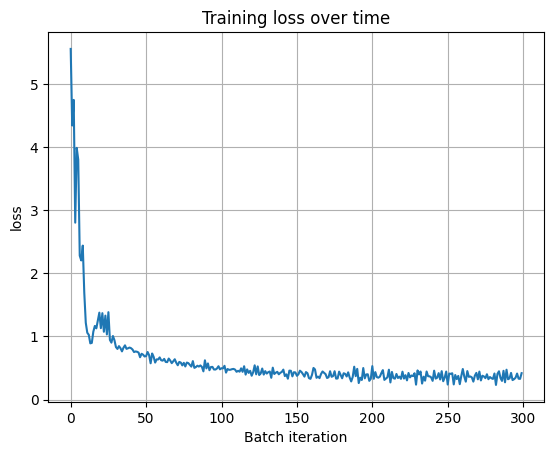

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training loss over time")
plt.xlabel("Batch iteration")
plt.ylabel("loss")
plt.grid(True)
plt.show()

In [3]:
import numpy as np
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [4]:
a.reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
a.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')  
data[['age_in_years', 'income(1000$)']]

,age_in_years,income(1000$)
0,51,8.75
1,54,7.62
2,36,11.09
3,61,14.27
4,40,9.36
...,...,...
86,32,7.94
87,26,6.81
88,58,11.89
89,49,6.88


In [2]:
data[['age_in_years', 'income(1000$)']].values

array([[51.  ,  8.75],
       [54.  ,  7.62],
       [36.  , 11.09],
       [61.  , 14.27],
       [40.  ,  9.36],
       [56.  ,  7.47],
       [63.  , 13.05],
       [25.  ,  7.14],
       [43.  ,  6.57],
       [45.  ,  9.92],
       [18.  , 14.55],
       [34.  ,  4.89],
       [60.  ,  6.29],
       [31.  , 10.26],
       [28.  , 12.79],
       [20.  ,  7.63],
       [35.  ,  1.66],
       [57.  ,  5.71],
       [64.  ,  2.83],
       [49.  , 14.14],
       [66.  ,  5.56],
       [29.  ,  3.55],
       [44.  ,  9.41],
       [30.  ,  6.12],
       [37.  , 12.99],
       [58.  ,  1.9 ],
       [62.  ,  5.26],
       [21.  , 13.14],
       [55.  , 14.88],
       [48.  , 11.97],
       [22.  ,  6.51],
       [27.  , 14.66],
       [32.  ,  9.92],
       [23.  ,  9.4 ],
       [38.  ,  2.84],
       [39.  ,  1.14],
       [50.  , 13.6 ],
       [59.  ,  4.58],
       [41.  ,  5.77],
       [26.  , 11.58],
       [33.  , 14.68],
       [42.  ,  1.36],
       [47.  ,  3.19],
       [53.

import 

In [1]:
! pip install torchvision

  Using cached torch-2.7.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 11.6 MB/s eta 0:00:00
Using cached torch-2.7.1-cp312-cp312-win_amd64.whl (216.1 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1
    Uninstalling torch-2.5.1:
      Successfully uninstalled torch-2.5.1


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1 requires torch==2.5.1, but you have torch 2.7.1 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
! pip install torchvision torch numpy pillow


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
